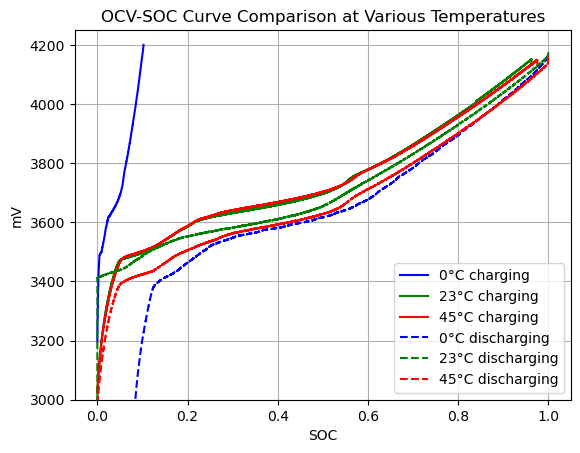

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data0c_charging = pd.read_csv('./data/OCV_SOC_0C_charging.csv')
data23c_charging = pd.read_csv('./data/OCV_SOC_23C_charging.csv')
data45c_charging = pd.read_csv('./data/OCV_SOC_45C_charging.csv')

data0c_discharging = pd.read_csv('./data/OCV_SOC_0C_discharging.csv')
data23c_discharging = pd.read_csv('./data/OCV_SOC_23C_discharging.csv')
data45c_discharging = pd.read_csv('./data/OCV_SOC_45C_discharging.csv')

# 在同一张图内以SOC和mV为单位绘制OCV-SOC曲线
plt.plot(data0c_charging['SOC'], data0c_charging['OCV(mV)'], label='0°C charging', color='blue')
plt.plot(data23c_charging['SOC'], data23c_charging['OCV(mV)'], label='23°C charging', color='green')
plt.plot(data45c_charging['SOC'], data45c_charging['OCV(mV)'], label='45°C charging', color='red')
plt.plot(data0c_discharging['SOC'], data0c_discharging['OCV(mV)'], label='0°C discharging', color='blue', linestyle='--')
plt.plot(data23c_discharging['SOC'], data23c_discharging['OCV(mV)'], label='23°C discharging', color='green', linestyle='--')
plt.plot(data45c_discharging['SOC'], data45c_discharging['OCV(mV)'], label='45°C discharging', color='red', linestyle='--')
plt.xlabel('SOC')
plt.ylabel('mV')
plt.ylim(3000, 4250)
plt.title('OCV-SOC Curve Comparison at Various Temperatures')
plt.legend()
plt.grid(True)
plt.show()

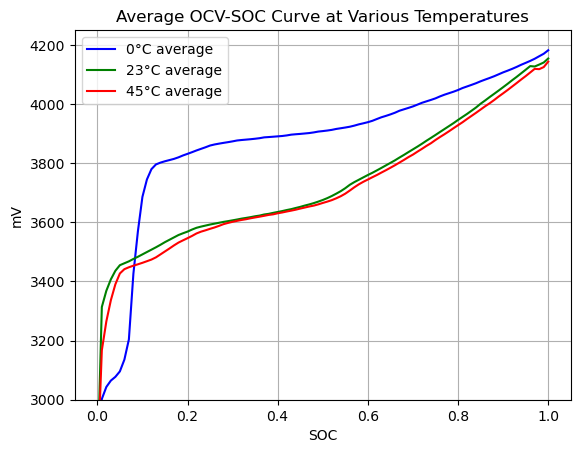

In [16]:
# 利用平均和线性插值法填补缺失数据

def interpolate_ocv_soc(data_charging, data_discharging):
    # 1. 定义一个统一的标准 SOC 轴（101个点）
    common_soc = np.linspace(0, 1, 101)

    # 2. 将充电数据插值到标准轴上
    # 注意：np.interp 要求 x 轴（SOC）必须是升序
    charge_interp = np.interp(common_soc, data_charging['SOC'], data_charging['OCV(mV)'])

    # 3. 将放电数据插值到标准轴上
    # 放电 SOC 通常是降序，需要先翻转数据
    df_dis_sorted = data_discharging.sort_values('SOC')
    discharge_interp = np.interp(common_soc, df_dis_sorted['SOC'], df_dis_sorted['OCV(mV)'])

    # 4. 计算平均值
    average_ocv = (charge_interp + discharge_interp) / 2

    return common_soc, average_ocv

# 求每个温度的平均OCV-SOC曲线
common_soc_0c, average_0c = interpolate_ocv_soc(data0c_charging, data0c_discharging)
common_soc_23c, average_23c = interpolate_ocv_soc(data23c_charging, data23c_discharging)
common_soc_45c, average_45c = interpolate_ocv_soc(data45c_charging, data45c_discharging)


plt.plot(common_soc_0c, average_0c, label='0°C average', color='blue')
plt.plot(common_soc_23c, average_23c, label='23°C average', color='green')
plt.plot(common_soc_45c, average_45c, label='45°C average', color='red')
plt.xlabel('SOC')
plt.ylabel('mV')
plt.ylim(3000, 4250)
plt.title('Average OCV-SOC Curve at Various Temperatures')
plt.legend()
plt.grid(True)
plt.show()